# Model Preprocessing 

In [545]:
# importing libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix,ConfusionMatrixDisplay,\
classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.compose import ColumnTransformer

# model preprocessing libraries 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer

# algorithm imports 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [ ]:
get feature names -> zip with feature importance -> dataframe -> plot 

In [4]:
# reading data for model preprocessing 
gamers_df = pd.read_csv('Data/preprocessed_data',index_col=0)
gamers_df

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,Game,Platform,...,streams,Gender,Age,Work,Degree,Birthplace,Residence,Playstyle,GAD_T,anxiety
S. No.,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",...,0.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Singleplayer,1,minimal anxiety
2,1,2,2,2,0,1,0,Somewhat difficult,Other,PC,...,2.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Multiplayer - online - with strangers,8,mild anxiety
3,0,2,2,0,0,3,1,Not difficult at all,Other,PC,...,0.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Singleplayer,8,mild anxiety
4,0,0,0,0,0,0,0,Not difficult at all,Other,PC,...,5.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Multiplayer - online - with online acquaintanc...,0,minimal anxiety
5,2,1,2,2,2,3,2,Very difficult,Other,"Console (PS, Xbox, ...)",...,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Multiplayer - online - with strangers,14,moderate anxiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14246,1,0,0,1,0,1,1,Not difficult at all,Other,"Console (PS, Xbox, ...)",...,10.0,Male,22,Student at college / university,Master (or equivalent),France,France,Multiplayer - online - with strangers,4,minimal anxiety
14247,3,3,3,3,2,3,3,Extremely difficult,League of Legends,PC,...,20.0,Female,20,Student at college / university,High school diploma (or equivalent),USA,USA,Multiplayer - online - with strangers,20,severe anxiety
14248,0,0,0,0,0,0,0,Not difficult at all,Starcraft 2,PC,...,14.0,Male,19,Student at college / university,High school diploma (or equivalent),Norway,Norway,Multiplayer - online - with real life friends,0,minimal anxiety


In [5]:
# looking at the different data types within the dataset 
gamers_df.dtypes

GAD1            int64
GAD2            int64
GAD3            int64
GAD4            int64
GAD5            int64
GAD6            int64
GAD7            int64
GADE           object
Game           object
Platform       object
Hours         float64
earnings       object
whyplay        object
streams       float64
Gender         object
Age             int64
Work           object
Degree         object
Birthplace     object
Residence      object
Playstyle      object
GAD_T           int64
anxiety        object
dtype: object

In [6]:
gamers_df.isna().sum()

GAD1            0
GAD2            0
GAD3            0
GAD4            0
GAD5            0
GAD6            0
GAD7            0
GADE          590
Game            0
Platform        0
Hours          22
earnings        0
whyplay         0
streams        81
Gender          0
Age             0
Work           34
Degree          0
Birthplace      0
Residence       0
Playstyle       0
GAD_T           0
anxiety         0
dtype: int64

### Data Preprocessing Workflow 

From our earlier EDA work, we identified several different strategies for dealing with NaN values in our dataset. 
- `GADE` NaN values should be imputed with "Did not answer"
- `Hours` NaN values should be imputed using the `IterativeImputer` class
- `streams` NaN values should be imputed with 0 
- `Work` NaN values should be imputed using the `IterativeImputer` class
- `Residence_ISO3` and `Birthplace_ISO3` NaN values should be imputed with 'AAA' to reflect 'Unknown' values in their corresponding columns. 

### Data Preprocessing Pipelines 

In [688]:
# columns to OneHotEncode in future preprocessing steps 
ohe_cols = ['Game','Platform','earnings','whyplay','Gender','Degree','Birthplace','Residence','Playstyle']

In [603]:
# creating different preprocessing pipelines to dela with NaN values 
# pipeline to replace NaNs in 'GADE' and 'Work' columns with 'Did not answer'
gadsurvey_pipeline = Pipeline([('obj_imputer', SimpleImputer(strategy='most_frequent'))])

# pipeline to replace NaNs in 'Hours and 'streams' with median value 
game_habits_pipeline = Pipeline([('numimputer', IterativeImputer(initial_strategy='median',random_state=42))])

In [604]:
gadsurvey_pipeline

Pipeline(steps=[('obj_imputer', SimpleImputer(strategy='most_frequent'))])

In [605]:
game_habits_pipeline

Pipeline(steps=[('numimputer',
                 IterativeImputer(initial_strategy='median', random_state=42))])

## Building a Baseline Model 

Before we ...

In [606]:
# splitting our dataset to predictor and target variables
X = gamers_df.drop(columns = ['anxiety','GAD_T'])
y = gamers_df['anxiety']

In [607]:
# viewing the distribution of class values 
y.value_counts(normalize=True)

minimal anxiety     0.555067
mild anxiety        0.271355
moderate anxiety    0.119506
severe anxiety      0.054072
Name: anxiety, dtype: float64

In [608]:
# label encoding our target variable 
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)

In [609]:
# setting up our target labels for classification report 
target_labels = ['minimal anxiety','mild anxiety','moderate anxiety','severe anxiety']

In [610]:
# train-test splitting our data before imputation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

In [611]:
# looking at the NaNs in training set 
X_train.isna().sum()

GAD1            0
GAD2            0
GAD3            0
GAD4            0
GAD5            0
GAD6            0
GAD7            0
GADE          446
Game            0
Platform        0
Hours          19
earnings        0
whyplay         0
streams        67
Gender          0
Age             0
Work           28
Degree          0
Birthplace      0
Residence       0
Playstyle       0
dtype: int64

In [612]:
# writing a ColumnTransformer object with our imputation pipelines 
preprocess_ct = ColumnTransformer(
    [("obj_imputer", gadsurvey_pipeline, ['GADE','Work']), 
     ("numimputer", game_habits_pipeline, ['Hours','streams'])])
preprocess_ct

ColumnTransformer(transformers=[('obj_imputer',
                                 Pipeline(steps=[('obj_imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['GADE', 'Work']),
                                ('numimputer',
                                 Pipeline(steps=[('numimputer',
                                                  IterativeImputer(initial_strategy='median',
                                                                   random_state=42))]),
                                 ['Hours', 'streams'])])

In [613]:
baseline_pipe = Pipeline([('preprocess', preprocess_ct),
                      ('model', DummyClassifier(strategy='stratified',random_state=42))])
baseline_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('obj_imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams'])])),
                ('model',
                 DummyClassifier(random_state=42, strategy='stratified'))])

In [614]:
baseline_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('obj_imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams'])])),
                ('model',
                 DummyClassifier(random_state=42, strategy='stratified'))])

In [615]:
base_y_pred = baseline_pipe.predict(X_test)

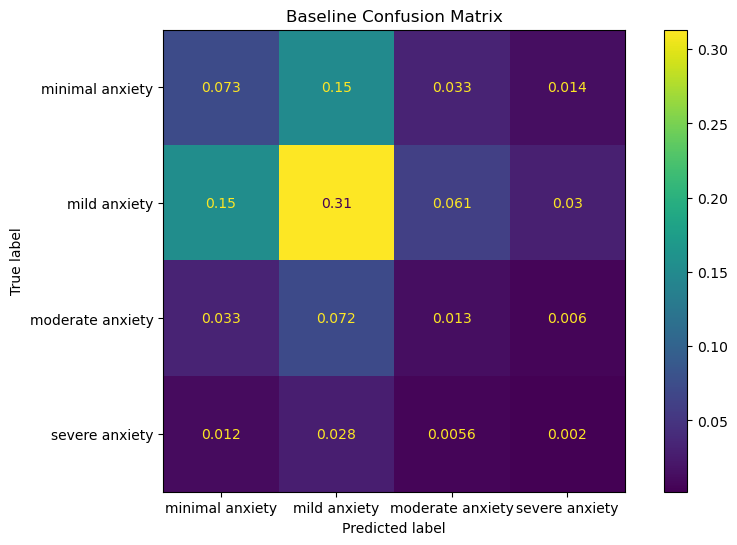

In [616]:
# confusion matrix for baseline DummyClassifier model 
fig,ax = plt.subplots(figsize=(10,6))
ax = ConfusionMatrixDisplay.from_predictions(y_test,base_y_pred, normalize='all',ax=ax)
plt.title("Baseline Confusion Matrix")
plt.xticks(ticks=[0,1,2,3], labels=target_labels)
plt.yticks(ticks=[0,1,2,3], labels=target_labels)
plt.savefig('images/baseline_correlation_matrix.png',dpi=300)

In [973]:
baseline_report = classification_report(y_test,base_y_pred,target_names=target_labels)
print(baseline_report)

                  precision    recall  f1-score   support

 minimal anxiety       0.27      0.27      0.27       817
    mild anxiety       0.55      0.56      0.56      1683
moderate anxiety       0.11      0.10      0.11       373
  severe anxiety       0.04      0.04      0.04       142

        accuracy                           0.40      3015
       macro avg       0.24      0.24      0.24      3015
    weighted avg       0.40      0.40      0.40      3015



### Baseline Model Conclusions 

**Conclusion**: Our baseline model uses the `DummyClassifier` to estimate values. 

## Model I | Logistic Regression

In [718]:
# feature selection 
non_predict_cols = ['anxiety','GAD_T']
X_1 = gamers_df.drop(columns=non_predict_cols)
y_1 = gamers_df['anxiety']

In [719]:
# label encoding our target variable 
y_1 = lab_enc.fit_transform(y_1)

In [720]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size = 0.25,random_state=42)

#### Model Preprocessing Pipelines 

In [693]:
# creating different pipelines for different scaling/encoding strategies 
num_pipeline = Pipeline([('numimputer', IterativeImputer(initial_strategy='median',random_state=42)),
                         ('agenorm',StandardScaler())])
obj_pipeline = Pipeline([('ohe_imputer', SimpleImputer(strategy='constant',fill_value='Did not answer')),
                         ('ohe_transform', OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first')),
                         ('ohe_norm',StandardScaler())])
cat_pipeline = Pipeline([('obj_norm',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first')),
                         ('ohe_norm',StandardScaler())])

In [694]:
# pipeline that imputes NaNs and scales 
num_pipeline

Pipeline(steps=[('numimputer',
                 IterativeImputer(initial_strategy='median', random_state=42)),
                ('agenorm', StandardScaler())])

In [695]:
# pipeline that imputes NaNs and then scales 
obj_pipeline

Pipeline(steps=[('ohe_imputer',
                 SimpleImputer(fill_value='Did not answer',
                               strategy='constant')),
                ('ohe_transform',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False)),
                ('ohe_norm', StandardScaler())])

In [696]:
num_cols = ['Age','Hours', 'streams']

In [698]:
# creating a model preprocessing ColumnTransformer object 
model_preprocess_ct = ColumnTransformer(
    [("num_pipeline", num_pipeline, num_cols),
     ('obj_pipeline', obj_pipeline, ['GADE','Work']),
     ('ohe_pipeline',cat_pipeline, ohe_cols)])

In [699]:
model_preprocess_ct

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('numimputer',
                                                  IterativeImputer(initial_strategy='median',
                                                                   random_state=42)),
                                                 ('agenorm',
                                                  StandardScaler())]),
                                 ['Age', 'Hours', 'streams']),
                                ('obj_pipeline',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value='Did '
                                                                           'not '
                                                                           'answer',
                                                                strategy='constant')),
                                                 ('ohe_transform',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('ohe_norm',
                                                  StandardScaler())]),
                                 ['GADE', 'Work']),
                                ('ohe_pipeline',
                                 Pipeline(steps=[('obj_norm',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('ohe_norm',
                                                  StandardScaler())]),
                                 ['Game', 'Platform', 'earnings', 'whyplay',
                                  'Gender', 'Degree', 'Birthplace', 'Residence',
                                  'Playstyle'])])

In [700]:
# logistic regression pipeline with all features standardized 
log_pipe = Pipeline([('preprocess', model_preprocess_ct),
     ('model',
      LogisticRegression(random_state=42,max_iter=10000))])
log_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42)),
                                                                  ('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age', 'Hours', 'streams']),
                                                 ('obj_pipeline',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Did '
                                                                                            'not '
                                                                                            'answer',
                                                                                 strategy='constant')),
                                                                  ('ohe_tran...
                                                                  ('ohe_norm',
                                                                   StandardScaler())]),
                                                  ['GADE', 'Work']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('obj_norm',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('ohe_norm',
                                                                   StandardScaler())]),
                                                  ['Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', LogisticRegression(max_iter=10000, random_state=42))])

In [701]:
log_pipe.fit(X1_train, y1_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42)),
                                                                  ('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age', 'Hours', 'streams']),
                                                 ('obj_pipeline',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Did '
                                                                                            'not '
                                                                                            'answer',
                                                                                 strategy='constant')),
                                                                  ('ohe_tran...
                                                                  ('ohe_norm',
                                                                   StandardScaler())]),
                                                  ['GADE', 'Work']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('obj_norm',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('ohe_norm',
                                                                   StandardScaler())]),
                                                  ['Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', LogisticRegression(max_iter=10000, random_state=42))])

In [702]:
log_y_pred = log_pipe.predict(X1_test)

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros


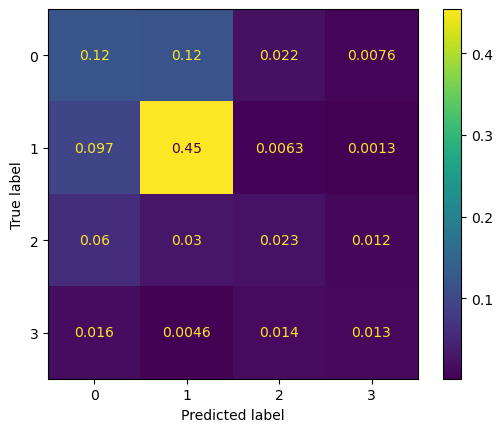

In [703]:
ConfusionMatrixDisplay.from_predictions(y1_test,log_y_pred, normalize='all')

In [741]:
# classification report for base logistic regression model w.o hyperparamter tuning 
base_logreg_report = classification_report(y1_test,log_y_pred, target_names=target_labels)
print(base_logreg_report)

                  precision    recall  f1-score   support

 minimal anxiety       0.42      0.45      0.43       817
    mild anxiety       0.75      0.81      0.78      1683
moderate anxiety       0.35      0.18      0.24       373
  severe anxiety       0.38      0.27      0.31       142

        accuracy                           0.61      3015
       macro avg       0.47      0.43      0.44      3015
    weighted avg       0.59      0.61      0.60      3015



In [705]:
# accuracy score for our base logistic regression model w.o hyperparameter tuning 
# base logistic regression uses all features 
accuracy_score(y1_test, log_y_pred)

0.6119402985074627

### Logistic Regression Hyperparameter Tuning 

In [721]:
# hyperparameter grid for Logistic Regression
baselog_pipe_grid = {'model__penalty':['l2'],
                 'model__C': [1e-4,1e-3,1e-2,1e-1,1],
                'model__solver':['lbfgs','newton-cg'],
                'model__class_weight':[None,'balanced']}

In [722]:
# RSV pipeline using hyperparameter grid
log_rsv_pipe = RandomizedSearchCV(estimator = log_pipe, 
                                       param_distributions = baselog_pipe_grid,
                                       n_iter = 10, 
                                       cv = 5)

In [723]:
# fitting on training data 
log_rsv_pipe.fit(X1_train,y1_train)

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2, 6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\skl

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num_pipeline',
                                                                               Pipeline(steps=[('numimputer',
                                                                                                IterativeImputer(initial_strategy='median',
                                                                                                                 random_state=42)),
                                                                                               ('agenorm',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Hours',
                                                                                'streams']),
                                                                              ('obj_pipeline',
                                                                               Pipeline(steps=[('ohe_imputer',
                                                                                                SimpleImputer(fill_value='Did '
                                                                                                                         'not '
                                                                                                                         'answer...
                                                                                               ('ohe_norm',
                                                                                                StandardScaler())]),
                                                                               ['Game',
                                                                                'Platform',
                                                                                'earnings',
                                                                                'whyplay',
                                                                                'Gender',
                                                                                'Degree',
                                                                                'Birthplace',
                                                                                'Residence',
                                                                                'Playstyle'])])),
                                             ('model',
                                              LogisticRegression(max_iter=10000,
                                                                 random_state=42))]),
                   param_distributions={'model__C': [0.0001, 0.001, 0.01, 0.1,
                                                     1],
                                        'model__class_weight': [None,
                                                                'balanced'],
                                        'model__penalty': ['l2'],
                                        'model__solver': ['lbfgs',
                                                          'newton-cg']})

In [726]:
# accuracy score
log_rsv_pipe.best_score_

0.6087597288875191

In [727]:
log_rsv_pipe.best_params_

{'model__solver': 'newton-cg',
 'model__penalty': 'l2',
 'model__class_weight': None,
 'model__C': 0.01}

In [728]:
# predicting on test set using best params 
log_best_model = log_rsv_pipe.best_estimator_
best_log_ypred = log_best_model.predict(X1_test)

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros


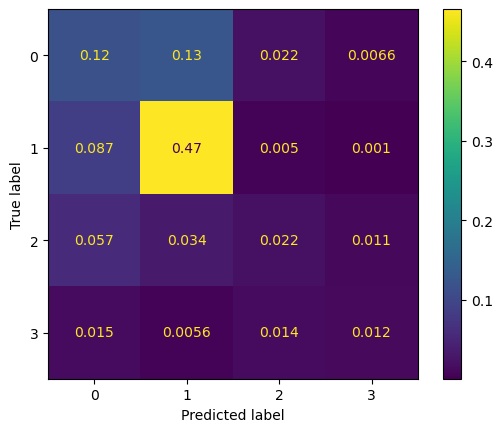

In [729]:
ConfusionMatrixDisplay.from_predictions(y1_test,best_log_ypred,normalize='all')

In [730]:
best_log_reg_report= classification_report(y1_test,best_log_ypred, target_names=target_labels)
print(best_log_reg_report)

                  precision    recall  f1-score   support

 minimal anxiety       0.42      0.43      0.43       817
    mild anxiety       0.74      0.83      0.78      1683
moderate anxiety       0.35      0.18      0.24       373
  severe anxiety       0.39      0.26      0.31       142

        accuracy                           0.62      3015
       macro avg       0.48      0.43      0.44      3015
    weighted avg       0.59      0.62      0.60      3015



### Baseline Logistic Regression Model & SMOTE 

In [731]:
# feature selection 
X_1_sm = gamers_df.drop(columns=non_predict_cols)
y_1_sm = gamers_df['anxiety']

In [732]:
# label encoding our target variable 
y_1_sm = lab_enc.fit_transform(y_1_sm)

In [733]:
model_preprocess_ct

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('numimputer',
                                                  IterativeImputer(initial_strategy='median',
                                                                   random_state=42)),
                                                 ('agenorm',
                                                  StandardScaler())]),
                                 ['Age', 'Hours', 'streams']),
                                ('obj_pipeline',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value='Did '
                                                                           'not '
                                                                           'answer',
                                                                strategy='constant')),
                                                 ('ohe_transform',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('ohe_norm',
                                                  StandardScaler())]),
                                 ['GADE', 'Work']),
                                ('ohe_pipeline',
                                 Pipeline(steps=[('obj_norm',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('ohe_norm',
                                                  StandardScaler())]),
                                 ['Game', 'Platform', 'earnings', 'whyplay',
                                  'Gender', 'Degree', 'Birthplace', 'Residence',
                                  'Playstyle'])])

In [734]:
# train-test splitting data  
X1_sm_train, X1_sm_test, y1_sm_train, y1_sm_test = train_test_split(X_1_sm, y_1_sm, test_size = 0.25,random_state=42)

In [735]:
sm_log_pipe = Pipeline([('preprocess', model_preprocess_ct),
                        ('smote',SMOTE(random_state=42)),
                        ('model',LogisticRegression(random_state=42,max_iter=10000))])

In [736]:
sm_log_pipe.fit(X1_sm_train,y1_sm_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42)),
                                                                  ('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age', 'Hours', 'streams']),
                                                 ('obj_pipeline',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Did '
                                                                                            'not '
                                                                                            'answer',
                                                                                 strategy='constant')),
                                                                  ('ohe_tran...
                                                  ['GADE', 'Work']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('obj_norm',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('ohe_norm',
                                                                   StandardScaler())]),
                                                  ['Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=10000, random_state=42))])

In [737]:
# predictions using baseline LogisticRegression model + SMOTE 
sm_log_preds = sm_log_pipe.predict(X1_sm_test)

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros


In [738]:
# classification report of base Logistic Regression model using SMOTE 
log_reg_sm_report = classification_report(y1_sm_test,sm_log_preds,target_names=target_labels)
print(log_reg_sm_report)

                  precision    recall  f1-score   support

 minimal anxiety       0.39      0.34      0.36       817
    mild anxiety       0.81      0.72      0.76      1683
moderate anxiety       0.20      0.27      0.23       373
  severe anxiety       0.23      0.51      0.32       142

        accuracy                           0.55      3015
       macro avg       0.41      0.46      0.42      3015
    weighted avg       0.59      0.55      0.57      3015



## Logistic Regression Model Evaluation 

In [742]:
print(f"Logistic Regression with All Features Classification Report")
print(base_logreg_report)
print('====================================================================')
print(f"Logistic Regression with All Features & SMOTE Classification Report")
print(log_reg_sm_report)
print('====================================================================')
print(f"Logistic Regression with All Features & Hyperparameter Tuning Classification Report")
print(best_logreg_report)

Logistic Regression with All Features Classification Report
                  precision    recall  f1-score   support

 minimal anxiety       0.42      0.45      0.43       817
    mild anxiety       0.75      0.81      0.78      1683
moderate anxiety       0.35      0.18      0.24       373
  severe anxiety       0.38      0.27      0.31       142

        accuracy                           0.61      3015
       macro avg       0.47      0.43      0.44      3015
    weighted avg       0.59      0.61      0.60      3015

Logistic Regression with All Features & SMOTE Classification Report
                  precision    recall  f1-score   support

 minimal anxiety       0.39      0.34      0.36       817
    mild anxiety       0.81      0.72      0.76      1683
moderate anxiety       0.20      0.27      0.23       373
  severe anxiety       0.23      0.51      0.32       142

        accuracy                           0.55      3015
       macro avg       0.41      0.46      0.42      30

### Model Evaluation Conclusions

**Questions:** 
- What conclusions can we draw based on hyperparameter tuning?
- What is our best model given different scoring criterions?

**Best Logistic Regression Model**
- Logistic Regression with Hyperparameter Tuning

## Model II | Decision Trees 

In [142]:
# separating our target and predictor variables 
X_2 = gamers_df.drop(columns=non_predict_cols)
y_2 = gamers_df['anxiety']

In [143]:
# label encoding our target variable 
y_2 = lab_enc.fit_transform(y_2)

In [144]:
# splitting our data into training and test set 
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size = 0.25,random_state=42)

In [145]:
dt_ct = ColumnTransformer(
    [("obj_imputer", survey_pipeline, ['GADE','Work']), 
     ("numimputer", game_habits_pipeline, ['Hours','streams']),
     ('age_pipe', age_pipeline, ['Age']),
     ('survey_pipe', survey_pipeline, ohe_cols)
    ])
dt_ct

ColumnTransformer(transformers=[('obj_imputer',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Work']),
                                ('numimputer',
                                 Pipeline(steps=[('numimputer',
                                                  IterativeImputer(initial_strategy='median',
                                                                   random_state=42))]),
                                 ['Hours', 'streams']),
                                ('age_pipe',
                                 Pipeline(steps=[('agenorm',
                                                  StandardScaler())]),
                                 ['Age']),
                                ('survey_pipe',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Game', 'Platform', 'earnings',
                                  'whyplay', 'Gender', 'Work', 'Degree',
                                  'Birthplace', 'Residence', 'Playstyle'])])

In [146]:
# DecisionTree pipeline with all features standardized 
dt_pipe = Pipeline([('preprocess', dt_ct),
     ('model',
      DecisionTreeClassifier(random_state=42))])
dt_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [147]:
# fitting DecisionTree Classifier on training set 
dt_pipe.fit(X2_train,y2_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [148]:
# predictions using Decision Tree Classifier 
dt_y_pred = dt_pipe.predict(X2_test)

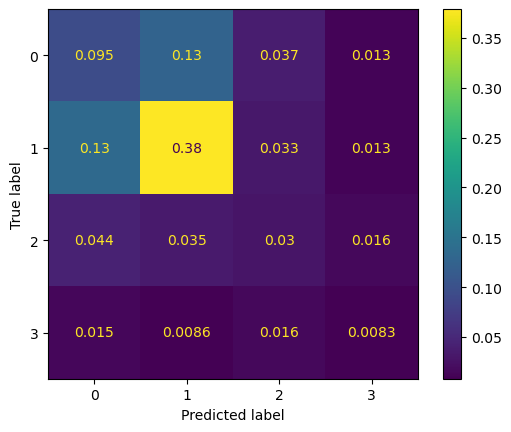

In [149]:
ConfusionMatrixDisplay.from_predictions(y2_test,dt_y_pred, normalize='all')

In [150]:
base_dt_report = classification_report(y2_test,dt_y_pred, target_names=target_labels)
print(base_dt_report)

                  precision    recall  f1-score   support

 minimal anxiety       0.33      0.35      0.34       817
    mild anxiety       0.69      0.68      0.68      1683
moderate anxiety       0.26      0.24      0.25       373
  severe anxiety       0.17      0.18      0.17       142

        accuracy                           0.51      3015
       macro avg       0.36      0.36      0.36      3015
    weighted avg       0.51      0.51      0.51      3015



### Baseline Decision Tree Model & SMOTE 

In [183]:
# feature selection 
X_2_sm = gamers_df.drop(columns=non_predict_cols)
y_2_sm = gamers_df['anxiety']

In [170]:
# label encoding our target variable 
y_2_sm = lab_enc.fit_transform(y_2_sm)

In [184]:
model_preprocess_ct

ColumnTransformer(transformers=[('obj_imputer',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Work']),
                                ('numimputer',
                                 Pipeline(steps=[('numimputer',
                                                  IterativeImputer(initial_strategy='median',
                                                                   random_state=42))]),
                                 ['Hours', 'streams']),
                                ('age_pipe',
                                 Pipeline(steps=[('agenorm',
                                                  StandardScaler())]),
                                 ['Age']),
                                ('survey_pipe',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Game', 'Platform', 'earnings',
                                  'whyplay', 'Gender', 'Work', 'Degree',
                                  'Birthplace', 'Residence', 'Playstyle'])])

In [185]:
X2_sm_train, X2_sm_test, y2_sm_train, y2_sm_test = train_test_split(X_2_sm, y_2_sm, test_size = 0.25,random_state=42)

In [186]:
sm_dt_pipe = Pipeline([('preprocess', model_preprocess_ct),
                        ('smote',SMOTE(random_state=42)),
                        ('model',LogisticRegression(random_state=42,max_iter=10000))])

In [187]:
sm_dt_pipe.fit(X1_sm_train,y1_sm_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('age...',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=10000, random_state=42))])

In [188]:
# predictions using baseline Decision Tree model + SMOTE 
sm_dt_preds = sm_dt_pipe.predict(X2_sm_test)

In [189]:
# classification report of base Logistic Regression model using SMOTE 
dt_sm_report = classification_report(y2_sm_test,sm_dt_preds)
print(dt_sm_report)

                  precision    recall  f1-score   support

    mild anxiety       0.41      0.37      0.38       817
 minimal anxiety       0.81      0.73      0.77      1683
moderate anxiety       0.21      0.25      0.23       373
  severe anxiety       0.24      0.51      0.32       142

        accuracy                           0.56      3015
       macro avg       0.41      0.46      0.43      3015
    weighted avg       0.60      0.56      0.58      3015



### Hyperparameter Tuning Baseline Decision Tree Classifier

In [191]:
# DecisionTreeClassifier parameters grid 
dt_params_grid = {'model__max_depth':[2,4,6,8,10],
                 'model__min_samples_split': [2,10,100,500,1000],
                'model__min_samples_leaf':[1,10,100,500,1000]}

In [192]:
# using RandomSearchCV with grid parameters,
dt_random_cv = RandomizedSearchCV(estimator = dt_pipe, 
                                       param_distributions = dt_params_grid,
                                       n_iter = 10, 
                                       cv = 5)

In [193]:
dt_random_cv.fit(X2_train,y2_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('obj_imputer',
                                                                               Pipeline(steps=[('ohe_transform',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['GADE',
                                                                                'Work']),
                                                                              ('numimputer',
                                                                               Pipeline(steps=[('numimputer',
                                                                                                IterativeImputer(initial_strategy='median',
                                                                                                                 random_state=42))]),
                                                                               ['Hours',
                                                                                'streams'])...
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['GADE',
                                                                                'Game',
                                                                                'Platform',
                                                                                'earnings',
                                                                                'whyplay',
                                                                                'Gender',
                                                                                'Work',
                                                                                'Degree',
                                                                                'Birthplace',
                                                                                'Residence',
                                                                                'Playstyle'])])),
                                             ('model',
                                              DecisionTreeClassifier(random_state=42))]),
                   param_distributions={'model__max_depth': [2, 4, 6, 8, 10],
                                        'model__min_samples_leaf': [1, 10, 100,
                                                                    500, 1000],
                                        'model__min_samples_split': [2, 10, 100,
                                                                     500,
                                                                     1000]})

In [194]:
# accuracy score of best Decision Tree Model with best params 
dt_random_cv.best_score_, dt_random_cv.best_params_

(0.6193758958403656,
 {'model__min_samples_split': 2,
  'model__min_samples_leaf': 10,
  'model__max_depth': 4})

In [198]:
# classification report using the most accurate DecisionTreeClassifier model 
best_dt_report = classification_report(y2_test,best_dt_preds,target_names=target_labels)
print(best_dt_report)

                  precision    recall  f1-score   support

 minimal anxiety       0.43      0.60      0.50       817
    mild anxiety       0.81      0.74      0.78      1683
moderate anxiety       0.37      0.24      0.29       373
  severe anxiety       0.39      0.23      0.29       142

        accuracy                           0.62      3015
       macro avg       0.50      0.45      0.46      3015
    weighted avg       0.63      0.62      0.62      3015



## Model Evaluation 

In [199]:
print(f"Decision Tree with All Features Classification Report")
print(base_dt_report)
print('====================================================================')
print(f"Decision Tree with All Features & SMOTE Classification Report")
print(dt_sm_report)
print('====================================================================')
print(f"Decision Tree with All Features & Hyperparameter Tuning Classification Report")
print(best_dt_report)

Decision Tree with All Features Classification Report
                  precision    recall  f1-score   support

 minimal anxiety       0.33      0.35      0.34       817
    mild anxiety       0.69      0.68      0.68      1683
moderate anxiety       0.26      0.24      0.25       373
  severe anxiety       0.17      0.18      0.17       142

        accuracy                           0.51      3015
       macro avg       0.36      0.36      0.36      3015
    weighted avg       0.51      0.51      0.51      3015

Decision Tree with All Features & SMOTE Classification Report
                  precision    recall  f1-score   support

    mild anxiety       0.41      0.37      0.38       817
 minimal anxiety       0.81      0.73      0.77      1683
moderate anxiety       0.21      0.25      0.23       373
  severe anxiety       0.24      0.51      0.32       142

        accuracy                           0.56      3015
       macro avg       0.41      0.46      0.43      3015
    weigh

### Model Evaluation Conclusions

**Questions:** 
- What conclusions can we draw based on hyperparameter tuning?
- What is our best model given different scoring criterions?

**Best Decision Tree Model**
- Decision Tree with All Features & Hyperparameter Tuned 

## Model III | Random Forest 

In [202]:
# separating our target and predictor variables 
X_3 = gamers_df.drop(columns=non_predict_cols)
y_3 = gamers_df['anxiety']

In [203]:
# label encoding our target variable 
y_3 = lab_enc.fit_transform(y_3)

In [204]:
# splitting our data into training and test set 
X3_train, X3_test, y3_train, y3_test = train_test_split(X_3, y_3, test_size = 0.25,random_state=42)

In [205]:
# RandomForest pipeline with all features standardized 
rf_pipe = Pipeline([('preprocess', model_preprocess_ct),
     ('model',
      RandomForestClassifier(random_state=42))])
rf_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [206]:
rf_pipe.fit(X3_train, y3_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [207]:
rf_y_pred = rf_pipe.predict(X3_test)

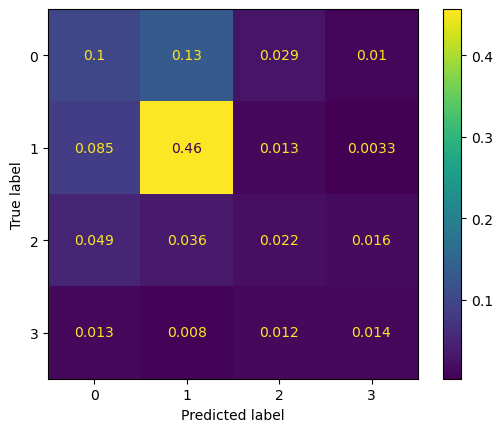

In [208]:
ConfusionMatrixDisplay.from_predictions(y3_test, rf_y_pred, normalize='all')

In [209]:
base_rf_report = classification_report(y3_test, rf_y_pred, target_names = target_labels)
print(base_rf_report)

                  precision    recall  f1-score   support

 minimal anxiety       0.40      0.37      0.39       817
    mild anxiety       0.72      0.82      0.77      1683
moderate anxiety       0.29      0.18      0.22       373
  severe anxiety       0.32      0.29      0.30       142

        accuracy                           0.59      3015
       macro avg       0.43      0.41      0.42      3015
    weighted avg       0.56      0.59      0.57      3015



### Baseline Random Forest Model & SMOTE 

In [223]:
# feature selection 
X_3_sm = gamers_df.drop(columns=non_predict_cols)
y_3_sm = gamers_df['anxiety']

In [224]:
# label encoding our target variable 
y_3_sm = lab_enc.fit_transform(y_3_sm)

In [225]:
X3_sm_train, X3_sm_test, y3_sm_train, y3_sm_test = train_test_split(X_3_sm, y_3_sm, test_size = 0.25,random_state=42)

In [226]:
sm_rf_pipe = Pipeline([('preprocess', model_preprocess_ct),
                        ('smote',SMOTE(random_state=42)),
                        ('model',LogisticRegression(random_state=42,max_iter=10000))])

In [227]:
sm_rf_pipe.fit(X3_sm_train,y3_sm_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('age...',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=10000, random_state=42))])

In [228]:
# predictions using baseline Decision Tree model + SMOTE 
sm_rf_preds = sm_rf_pipe.predict(X3_sm_test)

In [230]:
# classification report of base Logistic Regression model using SMOTE 
rf_sm_report = classification_report(y3_sm_test,sm_rf_preds, target_names=target_labels)
print(rf_sm_report)

                  precision    recall  f1-score   support

 minimal anxiety       0.41      0.37      0.38       817
    mild anxiety       0.81      0.73      0.77      1683
moderate anxiety       0.21      0.25      0.23       373
  severe anxiety       0.24      0.51      0.32       142

        accuracy                           0.56      3015
       macro avg       0.41      0.46      0.43      3015
    weighted avg       0.60      0.56      0.58      3015



### Hyperparameter Tuning Baseline Random Forest Classifier

In [210]:
# RandomForestClassifier parameters grid 
rf_pipe_grid = {'model__n_estimators':[50,100,150,200,250],
                'model__max_features':['sqrt','log2'],
                'model__min_samples_split': [2,10,100,500,1000],
                'model__min_samples_leaf':[1,10,100,500,1000]}

In [211]:
# using RandomizedSearchCV with new grid parameters,
rf_random_cv = RandomizedSearchCV(estimator = rf_pipe, 
                                       param_distributions = rf_pipe_grid,
                                       n_iter = 10, 
                                       cv = 5)

In [212]:
# fitting RandomizedSearchCV with training data 
rf_random_cv.fit(X3_train,y3_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('obj_imputer',
                                                                               Pipeline(steps=[('ohe_transform',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['GADE',
                                                                                'Work']),
                                                                              ('numimputer',
                                                                               Pipeline(steps=[('numimputer',
                                                                                                IterativeImputer(initial_strategy='median',
                                                                                                                 random_state=42))]),
                                                                               ['Hours',
                                                                                'streams'])...
                                                                                'Game',
                                                                                'Platform',
                                                                                'earnings',
                                                                                'whyplay',
                                                                                'Gender',
                                                                                'Work',
                                                                                'Degree',
                                                                                'Birthplace',
                                                                                'Residence',
                                                                                'Playstyle'])])),
                                             ('model',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'model__max_features': ['sqrt', 'log2'],
                                        'model__min_samples_leaf': [1, 10, 100,
                                                                    500, 1000],
                                        'model__min_samples_split': [2, 10, 100,
                                                                     500,
                                                                     1000],
                                        'model__n_estimators': [50, 100, 150,
                                                                200, 250]})

In [214]:
# accuracy score and best params side-by-side 
rf_random_cv.best_score_,rf_random_cv.best_params_

(0.6139559699046557,
 {'model__n_estimators': 250,
  'model__min_samples_split': 10,
  'model__min_samples_leaf': 1,
  'model__max_features': 'log2'})

In [216]:
# calculating predictions based on best parameters for accuracy 
best_rf_preds = rf_random_cv.predict(X3_test)

In [217]:
# precision score on test set data 
precision_score(y3_test,best_rf_preds,average='weighted')

0.5849381699043396

In [221]:
best_rf_report = classification_report(y3_test, best_rf_preds, target_names = target_labels)
print(best_rf_report)

                  precision    recall  f1-score   support

 minimal anxiety       0.42      0.41      0.42       817
    mild anxiety       0.73      0.84      0.78      1683
moderate anxiety       0.35      0.18      0.24       373
  severe anxiety       0.39      0.28      0.33       142

        accuracy                           0.61      3015
       macro avg       0.47      0.43      0.44      3015
    weighted avg       0.58      0.61      0.59      3015



## Model Evaluation 

In [231]:
print(f"Random Forest with All Features Classification Report")
print(base_rf_report)
print('====================================================================')
print(f"Random Forest with All Features & SMOTE Classification Report")
print(rf_sm_report)
print('====================================================================')
print(f"Random Forest with All Features & Hyperparameter Tuning Classification Report")
print(best_rf_report)

Random Forest with All Features Classification Report
                  precision    recall  f1-score   support

 minimal anxiety       0.40      0.37      0.39       817
    mild anxiety       0.72      0.82      0.77      1683
moderate anxiety       0.29      0.18      0.22       373
  severe anxiety       0.32      0.29      0.30       142

        accuracy                           0.59      3015
       macro avg       0.43      0.41      0.42      3015
    weighted avg       0.56      0.59      0.57      3015

Random Forest with All Features & SMOTE Classification Report
                  precision    recall  f1-score   support

 minimal anxiety       0.41      0.37      0.38       817
    mild anxiety       0.81      0.73      0.77      1683
moderate anxiety       0.21      0.25      0.23       373
  severe anxiety       0.24      0.51      0.32       142

        accuracy                           0.56      3015
       macro avg       0.41      0.46      0.43      3015
    weigh

## Model IV | Naive Bayes

In [121]:
# separating our target and predictor variables 
X_4 = gamers_df.drop(columns=non_predict_cols)
y_4 = gamers_df['anxiety']

In [122]:
# label encoding our target variable 
y_4 = lab_enc.fit_transform(y_4)

In [123]:
# splitting our data into training and test set 
X4_train, X4_test, y4_train, y4_test = train_test_split(X_4, y_4, test_size = 0.25,random_state=42)

In [124]:
nb_ct = ColumnTransformer(
    [("obj_imputer", survey_pipeline, ['GADE','Work']), 
     ("numimputer", game_habits_pipeline, ['Hours','streams']),
     ('age_pipe', age_pipeline, ['Age']),
     ('survey_pipe', survey_pipeline, ohe_cols)
    ])
nb_ct

ColumnTransformer(transformers=[('obj_imputer',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Work']),
                                ('numimputer',
                                 Pipeline(steps=[('numimputer',
                                                  IterativeImputer(initial_strategy='median',
                                                                   random_state=42))]),
                                 ['Hours', 'streams']),
                                ('age_pipe',
                                 Pipeline(steps=[('agenorm',
                                                  StandardScaler())]),
                                 ['Age']),
                                ('survey_pipe',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Game', 'Platform', 'earnings',
                                  'whyplay', 'Gender', 'Work', 'Degree',
                                  'Birthplace', 'Residence', 'Playstyle'])])

In [125]:
# Naive Bayes Classification pipeline with all features standardized 
nb_pipe = Pipeline([('preprocess', nb_ct),
     ('model',
      GaussianNB())])
nb_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', GaussianNB())])

In [126]:
nb_pipe.fit(X4_train,y4_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', GaussianNB())])

In [127]:
nb_y_pred = nb_pipe.predict(X4_test)

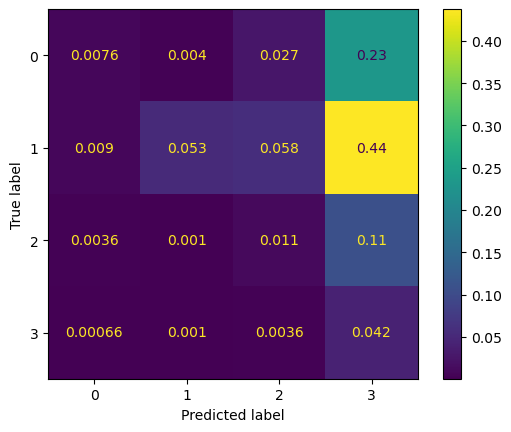

In [128]:
ConfusionMatrixDisplay.from_predictions(y4_test, nb_y_pred, normalize='all')

In [129]:
print(classification_report(y4_test, nb_y_pred, target_names = target_labels))

                  precision    recall  f1-score   support

 minimal anxiety       0.37      0.03      0.05       817
    mild anxiety       0.90      0.10      0.17      1683
moderate anxiety       0.11      0.09      0.10       373
  severe anxiety       0.05      0.89      0.10       142

        accuracy                           0.11      3015
       macro avg       0.36      0.28      0.11      3015
    weighted avg       0.62      0.11      0.13      3015



#### Quadratic Discriminat Analysis (QDA)

In [331]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_pipe = Pipeline([('preprocess', nb_ct),
     ('model',
      QuadraticDiscriminantAnalysis())])
qda_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', QuadraticDiscriminantAnalysis())])

In [332]:
qda_pipe.fit(X4_train,y4_train)

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', QuadraticDiscriminantAnalysis())])

In [334]:
qda_y_pred = qda_pipe.predict(X4_test)

In [335]:
print(classification_report(y4_test, qda_y_pred, target_names = target_labels))

                  precision    recall  f1-score   support

 minimal anxiety       0.28      0.02      0.03       817
    mild anxiety       0.38      0.01      0.02      1683
moderate anxiety       0.11      0.08      0.09       373
  severe anxiety       0.05      0.91      0.09       142

        accuracy                           0.06      3015
       macro avg       0.20      0.25      0.06      3015
    weighted avg       0.30      0.06      0.03      3015



### Model Evaluation 

## Model V | K-Nearest Neighbors Classification 

In [341]:
# separating our target and predictor variables 
X_5 = gamers_df.drop(columns=non_predict_cols)
y_5 = gamers_df['anxiety']

In [342]:
# label encoding our target variable 
y_5 = lab_enc.fit_transform(y_5)

In [343]:
# splitting our data into training and test set 
X5_train, X5_test, y5_train, y5_test = train_test_split(X_5, y_5, test_size = 0.25,random_state=42)

In [344]:
knn_ct = ColumnTransformer(
    [("obj_imputer", survey_pipeline, ['GADE','Work']), 
     ("numimputer", game_habits_pipeline, ['Hours','streams']),
     ('age_pipe', age_pipeline, ['Age']),
     ('survey_pipe', survey_pipeline, ohe_cols)
    ])
knn_ct

ColumnTransformer(transformers=[('obj_imputer',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Work']),
                                ('numimputer',
                                 Pipeline(steps=[('numimputer',
                                                  IterativeImputer(initial_strategy='median',
                                                                   random_state=42))]),
                                 ['Hours', 'streams']),
                                ('age_pipe',
                                 Pipeline(steps=[('agenorm',
                                                  StandardScaler())]),
                                 ['Age']),
                                ('survey_pipe',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Game', 'Platform', 'earnings',
                                  'whyplay', 'Gender', 'Work', 'Degree',
                                  'Birthplace', 'Residence', 'Playstyle'])])

In [345]:
# K-Nearest Neighbors Classification pipeline with all features standardized 
knn_pipe = Pipeline([('preprocess', knn_ct),
     ('model',
      KNeighborsClassifier())])
knn_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', KNeighborsClassifier())])

In [346]:
knn_pipe.fit(X5_train,y5_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', KNeighborsClassifier())])

In [347]:
knn_y_pred = knn_pipe.predict(X5_test)

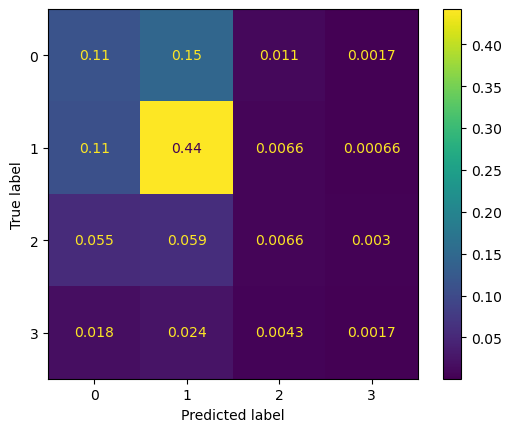

In [348]:
ConfusionMatrixDisplay.from_predictions(y5_test, knn_y_pred, normalize='all')

In [349]:
print(classification_report(y5_test, knn_y_pred, target_names = target_labels))

                  precision    recall  f1-score   support

 minimal anxiety       0.38      0.42      0.40       817
    mild anxiety       0.66      0.79      0.72      1683
moderate anxiety       0.24      0.05      0.09       373
  severe anxiety       0.24      0.04      0.06       142

        accuracy                           0.56      3015
       macro avg       0.38      0.32      0.32      3015
    weighted avg       0.51      0.56      0.52      3015



### Model Evaluation 

### K-Nearest Neighbors Hyperparameter Tuning 

In [ ]:
KNeighborsClassifier()

In [351]:
# KNearestNeighbors parameters grid 
knn_pipe_grid = {'model__n_neighbors':[3, 11, 15],
                 'model__p': [1, 2]}

In [354]:
# using RandomizedSearchCV with new grid parameters,
knn_random_cv = RandomizedSearchCV(estimator = knn_pipe, 
                                       param_distributions = knn_pipe_grid,
                                       n_iter = 6, 
                                       cv = 5)

In [355]:
knn_random_cv.fit(X5_train,y5_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('obj_imputer',
                                                                               Pipeline(steps=[('ohe_transform',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['GADE',
                                                                                'Work']),
                                                                              ('numimputer',
                                                                               Pipeline(steps=[('numimputer',
                                                                                                IterativeImputer(initial_strategy='median',
                                                                                                                 random_state=42))]),
                                                                               ['Hours',
                                                                                'streams'])...
                                                                                                StandardScaler())]),
                                                                               ['Age']),
                                                                              ('survey_pipe',
                                                                               Pipeline(steps=[('ohe_transform',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['GADE',
                                                                                'Game',
                                                                                'Platform',
                                                                                'earnings',
                                                                                'whyplay',
                                                                                'Gender',
                                                                                'Work',
                                                                                'Degree',
                                                                                'Birthplace',
                                                                                'Residence',
                                                                                'Playstyle'])])),
                                             ('model',
                                              KNeighborsClassifier())]),
                   n_iter=6,
                   param_distributions={'model__n_neighbors': [3, 11, 15],
                                        'model__p': [1, 2]})

In [357]:
# calculating predictions based on best parameters for accuracy 
best_acc_knn_preds = knn_random_cv.predict(X5_test)

In [358]:
print(classification_report(y5_test, best_acc_knn_preds, target_names = target_labels))

                  precision    recall  f1-score   support

 minimal anxiety       0.38      0.36      0.37       817
    mild anxiety       0.65      0.83      0.73      1683
moderate anxiety       0.26      0.05      0.09       373
  severe anxiety       0.45      0.04      0.07       142

        accuracy                           0.57      3015
       macro avg       0.43      0.32      0.31      3015
    weighted avg       0.52      0.57      0.52      3015



### Conclusion

**Thoughts**

## Model VI | XG Boost

In [744]:
model_preprocess_ct

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('numimputer',
                                                  IterativeImputer(initial_strategy='median',
                                                                   random_state=42)),
                                                 ('agenorm',
                                                  StandardScaler())]),
                                 ['Age', 'Hours', 'streams']),
                                ('obj_pipeline',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value='Did '
                                                                           'not '
                                                                           'answer',
                                                                strategy='constant')),
                                                 ('ohe_transform',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('ohe_norm',
                                                  StandardScaler())]),
                                 ['GADE', 'Work']),
                                ('ohe_pipeline',
                                 Pipeline(steps=[('obj_norm',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('ohe_norm',
                                                  StandardScaler())]),
                                 ['Game', 'Platform', 'earnings', 'whyplay',
                                  'Gender', 'Degree', 'Birthplace', 'Residence',
                                  'Playstyle'])])

In [745]:
# separating our target and predictor variables 
X_6 = gamers_df.drop(columns=non_predict_cols)
y_6 = gamers_df['anxiety']

In [746]:
# label encoding our target variable 
y_6 = lab_enc.fit_transform(y_6)

In [747]:
# splitting our data into training and test set 
X6_train, X6_test, y6_train, y6_test = train_test_split(X_6, y_6, test_size = 0.25,random_state=42)

In [748]:
# XGBoost pipeline with all features standardized 
xgb_pipe = Pipeline([('preprocess', model_preprocess_ct),
     ('model',
      XGBClassifier(random_state=42))])
xgb_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42)),
                                                                  ('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age', 'Hours', 'streams']),
                                                 ('obj_pipeline',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Did '
                                                                                            'not '
                                                                                            'answer',
                                                                                 strategy='constant')),
                                                                  ('ohe_tran...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [749]:
# fitting XGB pipeline on training set 
xgb_pipe.fit(X6_train,y6_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42)),
                                                                  ('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age', 'Hours', 'streams']),
                                                 ('obj_pipeline',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Did '
                                                                                            'not '
                                                                                            'answer',
                                                                                 strategy='constant')),
                                                                  ('ohe_tran...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [750]:
# baseline prediction for XGBoostClassification on test set 
xgb_pipe_preds = xgb_pipe.predict(X6_test)

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros


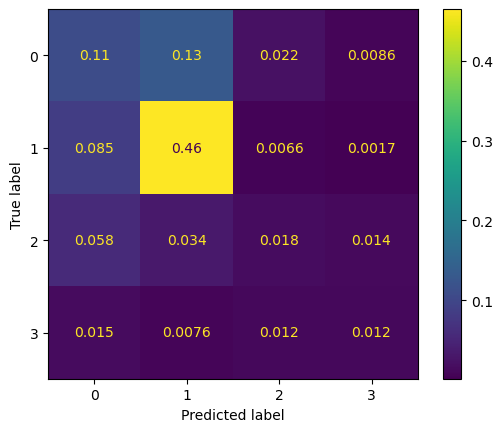

In [751]:
ConfusionMatrixDisplay.from_predictions(y6_test,xgb_pipe_preds, normalize='all')

In [752]:
base_xgb_report = classification_report(y6_test,xgb_pipe_preds, target_names=target_labels)
print(base_xgb_report)

                  precision    recall  f1-score   support

 minimal anxiety       0.41      0.40      0.40       817
    mild anxiety       0.73      0.83      0.78      1683
moderate anxiety       0.30      0.14      0.20       373
  severe anxiety       0.34      0.26      0.29       142

        accuracy                           0.60      3015
       macro avg       0.44      0.41      0.42      3015
    weighted avg       0.57      0.60      0.58      3015



### Baseline XGBoost Model & SMOTE 

In [753]:
# feature selection 
X_6_sm = gamers_df.drop(columns=non_predict_cols)
y_6_sm = gamers_df['anxiety']

In [754]:
# label encoding our target variable 
y_6_sm = lab_enc.fit_transform(y_6_sm)

In [755]:
X6_sm_train, X6_sm_test, y6_sm_train, y6_sm_test = train_test_split(X_6_sm, y_6_sm, test_size = 0.25,random_state=42)

In [756]:
sm_xgb_pipe = Pipeline([('preprocess', model_preprocess_ct),
                        ('smote',SMOTE(random_state=42)),
                        ('model',LogisticRegression(random_state=42,max_iter=10000))])

In [757]:
sm_xgb_pipe.fit(X6_sm_train,y6_sm_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42)),
                                                                  ('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age', 'Hours', 'streams']),
                                                 ('obj_pipeline',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Did '
                                                                                            'not '
                                                                                            'answer',
                                                                                 strategy='constant')),
                                                                  ('ohe_tran...
                                                  ['GADE', 'Work']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('obj_norm',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('ohe_norm',
                                                                   StandardScaler())]),
                                                  ['Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=10000, random_state=42))])

In [758]:
# predictions using baseline Decision Tree model + SMOTE 
sm_xgb_preds = sm_xgb_pipe.predict(X6_sm_test)

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros


In [759]:
# classification report of base Logistic Regression model using SMOTE 
xgb_sm_report = classification_report(y6_sm_test,sm_xgb_preds, target_names=target_labels)
print(xgb_sm_report)

                  precision    recall  f1-score   support

 minimal anxiety       0.39      0.34      0.36       817
    mild anxiety       0.81      0.72      0.76      1683
moderate anxiety       0.20      0.27      0.23       373
  severe anxiety       0.23      0.51      0.32       142

        accuracy                           0.55      3015
       macro avg       0.41      0.46      0.42      3015
    weighted avg       0.59      0.55      0.57      3015



## XGBoost Hyperparameter Tuning

In [760]:
xgb_params = {'model__max_depth': [3,4, 5], 
              'model__learning_rate': [.1, .3, .5],
              'model__gamma': [0,5,10], 
              'model__n_estimators': [50,100, 150] }

In [761]:
# using RandomizedSearchCV with new grid parameters,
xgb_random_cv = RandomizedSearchCV(estimator = xgb_pipe, 
                                       param_distributions = xgb_params,
                                       n_iter = 10, 
                                       cv = 5)

In [762]:
xgb_random_cv.fit(X6_train,y6_train)

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2, 6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\skl

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num_pipeline',
                                                                               Pipeline(steps=[('numimputer',
                                                                                                IterativeImputer(initial_strategy='median',
                                                                                                                 random_state=42)),
                                                                                               ('agenorm',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Hours',
                                                                                'streams']),
                                                                              ('obj_pipeline',
                                                                               Pipeline(steps=[('ohe_imputer',
                                                                                                SimpleImputer(fill_value='Did '
                                                                                                                         'not '
                                                                                                                         'answer...
                                                            max_delta_step=None,
                                                            max_depth=None,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            objective='multi:softprob',
                                                            predictor=None, ...))]),
                   param_distributions={'model__gamma': [0, 5, 10],
                                        'model__learning_rate': [0.1, 0.3, 0.5],
                                        'model__max_depth': [3, 4, 5],
                                        'model__n_estimators': [50, 100, 150]})

In [763]:
xgb_random_cv.best_score_

0.6212555707206348

In [764]:
best_xgb_preds = xgb_random_cv.predict(X6_test)

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros


In [768]:
from sklearn.metrics import matthews_corrcoef

In [769]:
matthews_corrcoef(y6_test,best_xgb_preds)

0.36840066782502434

In [770]:
from sklearn.metrics import cohen_kappa_score

In [771]:
cohen_kappa_score(y6_test,best_xgb_preds)

0.36316014323616186

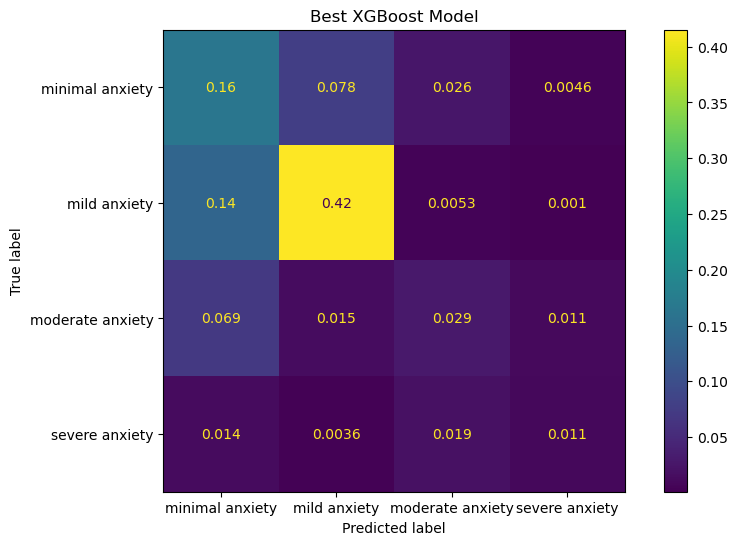

In [765]:
# confusion matrix for best XGBoost model 
fig,ax = plt.subplots(figsize=(10,6))
ax = ConfusionMatrixDisplay.from_predictions(y6_test,best_xgb_preds, normalize='all',ax=ax)
plt.title("Best XGBoost Model")
plt.xticks(ticks=[0,1,2,3], labels=target_labels)
plt.yticks(ticks=[0,1,2,3], labels=target_labels)
plt.savefig('images/bestxgbmodel_correlation_matrix.png',dpi=300)

In [766]:
best_xgb_report = classification_report(y6_test,best_xgb_preds, target_names=target_labels)
print(best_xgb_report)

                  precision    recall  f1-score   support

 minimal anxiety       0.43      0.60      0.50       817
    mild anxiety       0.81      0.74      0.78      1683
moderate anxiety       0.37      0.24      0.29       373
  severe anxiety       0.39      0.23      0.29       142

        accuracy                           0.62      3015
       macro avg       0.50      0.45      0.46      3015
    weighted avg       0.63      0.62      0.62      3015



## Model Evaluation 

In [767]:
print(f"XGBoost Model with All Features Classification Report")
print(base_xgb_report)
print('====================================================================')
print(f"XGBoost Model with All Features & SMOTE Classification Report")
print(xgb_sm_report)
print('====================================================================')
print(f"XGBoost Model with All Features & Hyperparameter Tuning Classification Report")
print(best_xgb_report)

XGBoost Model with All Features Classification Report
                  precision    recall  f1-score   support

 minimal anxiety       0.41      0.40      0.40       817
    mild anxiety       0.73      0.83      0.78      1683
moderate anxiety       0.30      0.14      0.20       373
  severe anxiety       0.34      0.26      0.29       142

        accuracy                           0.60      3015
       macro avg       0.44      0.41      0.42      3015
    weighted avg       0.57      0.60      0.58      3015

XGBoost Model with All Features & SMOTE Classification Report
                  precision    recall  f1-score   support

 minimal anxiety       0.39      0.34      0.36       817
    mild anxiety       0.81      0.72      0.76      1683
moderate anxiety       0.20      0.27      0.23       373
  severe anxiety       0.23      0.51      0.32       142

        accuracy                           0.55      3015
       macro avg       0.41      0.46      0.42      3015
    weigh

# Conclusion 

In [258]:
print(f"Baseline Dummy Classifier")
print(baseline_report)
print('====================================================================')
print(f"Best Logistic Regression Model")
print(best_logreg_report)
print('====================================================================')
print(f"Best Decision Tree Regression Model ")
print(best_dt_report)
print('====================================================================')
print(f"Best Random Forest Tree Regression Model")
print(best_rf_report)
print('====================================================================')
print(f"Best XGBoost Regression Model")
print(best_xgb_report)

Baseline Dummy Classifier
                  precision    recall  f1-score   support

 minimal anxiety       0.27      0.27      0.27       817
    mild anxiety       0.55      0.56      0.56      1683
moderate anxiety       0.11      0.10      0.11       373
  severe anxiety       0.04      0.04      0.04       142

        accuracy                           0.40      3015
       macro avg       0.24      0.24      0.24      3015
    weighted avg       0.40      0.40      0.40      3015

Best Logistic Regression Model
                  precision    recall  f1-score   support

 minimal anxiety       0.43      0.51      0.47       817
    mild anxiety       0.76      0.81      0.78      1683
moderate anxiety       0.38      0.20      0.26       373
  severe anxiety       0.44      0.22      0.29       142

        accuracy                           0.62      3015
       macro avg       0.50      0.43      0.45      3015
    weighted avg       0.61      0.62      0.61      3015

Best Deci

## XGBoost Feature Importances

In [783]:
names = xgb_random_cv.best_estimator_.steps[0][1].get_feature_names_out()

In [785]:
feature_importances = xgb_random_cv.best_estimator_.named_steps['model'].feature_importances_

In [860]:
best_features = list(zip(names,feature_importances))
best_features_df = pd.DataFrame(best_features, columns=['Name', 'Feature Importance'])
best_features_df['Feature Importance'] = best_features_df['Feature Importance'] * 100

In [861]:
best_features_df = best_features_df[best_features_df['Feature Importance'] != 0]

In [862]:
best_features_df

,Name,Feature Importance
1,num_pipeline__Hours,2.896765
3,obj_pipeline__GADE_Extremely difficult,22.430065
4,obj_pipeline__GADE_Not difficult at all,29.818020
5,obj_pipeline__GADE_Somewhat difficult,20.675262
6,obj_pipeline__GADE_Very difficult,13.973306
28,ohe_pipeline__whyplay_winning,3.559901
29,ohe_pipeline__Gender_Male,3.251722
124,ohe_pipeline__Birthplace_Romania,3.394956


In [863]:
bar_order = best_features_df.sort_values('Feature Importance',ascending = False)['Name']

In [851]:
feature_tick_labels = ['GADE_Not diffficult at all','GADE_Extremely difficult','GADE_Somewhat Difficult',
                       'GADE_Very Difficult','Winning','Born in Romania','Male', 'Hours Played']

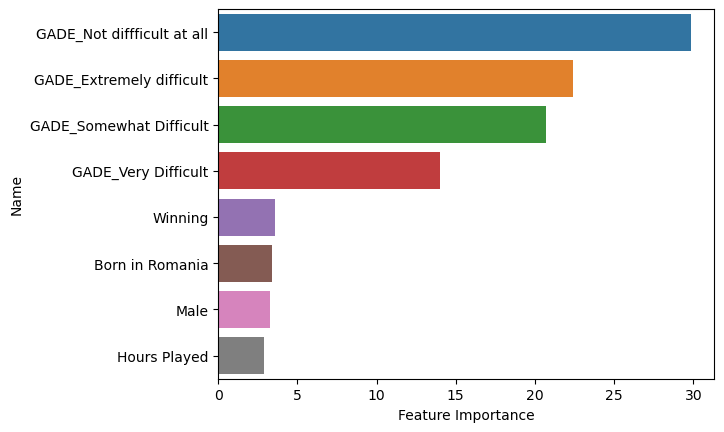

In [1135]:
ax = sns.barplot(y='Name',x='Feature Importance',data=best_features_df,order=bar_order)
ax.set_yticklabels(feature_tick_labels)
plt.savefig('images/feature_importances.png',dpi=600)

## Classification Metrics for Best Models 

### Baseline Model: `DummyClassifier()`

In [1083]:
# exporting baseline classification report to a dictionary 
baseline_report_dict = classification_report(y_test,base_y_pred,target_names=target_labels,output_dict=True)

In [1084]:
# creating new dataframe with classification metrics 
metrics_df = pd.DataFrame(columns=['model_name','accuracy','precision','recall','f1-score','support'])

In [1085]:
baseline_dict = baseline_report_dict['weighted avg']
baseline_dict.update({'model_name':'baseline'})
baseline_dict.update({'accuracy':baseline_report_dict['accuracy']})
baseline_dict

{'precision': 0.39830827664666074,
 'recall': 0.40066334991708125,
 'f1-score': 0.3994461198498057,
 'support': 3015,
 'model_name': 'baseline',
 'accuracy': 0.40066334991708125}

In [1086]:
metrics_df = metrics_df.append(baseline_dict,ignore_index=True)
metrics_df

C:\Users\Kevin\AppData\Local\Temp\ipykernel_32676\521539491.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,model_name,accuracy,precision,recall,f1-score,support
0,baseline,0.400663,0.398308,0.400663,0.399446,3015


### Hyperparameter Tuned Model: `LogisticRegression()`

In [1087]:
# exporting classification report as dictionary 
best_logreg_dict = classification_report(y1_test,best_log_ypred, target_names=target_labels,output_dict=True)

In [1088]:
best_logreg = best_logreg_dict['weighted avg']
best_logreg.update({'model_name':'tuned logreg'})
best_logreg.update({'accuracy':best_logreg_dict['accuracy']})
best_logreg

{'precision': 0.5891323607938105,
 'recall': 0.6169154228855721,
 'f1-score': 0.597188716148147,
 'support': 3015,
 'model_name': 'tuned logreg',
 'accuracy': 0.6169154228855721}

In [1089]:
metrics_df = metrics_df.append(best_logreg,ignore_index=True)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_32676\4276980871.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [1090]:
metrics_df

,model_name,accuracy,precision,recall,f1-score,support
0,baseline,0.400663,0.398308,0.400663,0.399446,3015
1,tuned logreg,0.616915,0.589132,0.616915,0.597189,3015


### Hyperparameter Tuned Model: `DecisionTreeClassifier()`

In [1091]:
# exporting classification report as dictionary 
best_dt_dict = classification_report(y2_test,best_dt_preds,target_names=target_labels,output_dict=True)

In [1092]:
best_dt = best_dt_dict['weighted avg']
best_dt.update({'model_name':'tuned decision tree'})
best_dt.update({'accuracy':best_dt_dict['accuracy']})
best_dt

{'precision': 0.6335396847456916,
 'recall': 0.6182421227197347,
 'f1-score': 0.6180592765164579,
 'support': 3015,
 'model_name': 'tuned decision tree',
 'accuracy': 0.6182421227197347}

In [1093]:
metrics_df = metrics_df.append(best_dt,ignore_index=True)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_32676\2703978340.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [1094]:
metrics_df

,model_name,accuracy,precision,recall,f1-score,support
0,baseline,0.400663,0.398308,0.400663,0.399446,3015
1,tuned logreg,0.616915,0.589132,0.616915,0.597189,3015
2,tuned decision tree,0.618242,0.633540,0.618242,0.618059,3015


### Hyperparameter Tuned Model: `XGBoostClassifier()`

In [1095]:
# exporting classification report as dictionary 
best_xgb_dict = classification_report(y6_test,best_xgb_preds, target_names=target_labels,output_dict=True)

In [1096]:
xgb_acc = best_xgb_dict['accuracy']

In [1097]:
best_xgb = best_xgb_dict['weighted avg']
best_xgb.update({'model_name':'tuned xgboost'})
best_xgb.update({'accuracy':best_xgb_dict['accuracy']})
best_xgb

{'precision': 0.6328486430090192,
 'recall': 0.6179104477611941,
 'f1-score': 0.6176580963803061,
 'support': 3015,
 'model_name': 'tuned xgboost',
 'accuracy': 0.6179104477611941}

In [1099]:
metrics_df = metrics_df.append(best_xgb,ignore_index=True)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_32676\4131615785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [1100]:
metrics_df

,model_name,accuracy,precision,recall,f1-score,support
0,baseline,0.400663,0.398308,0.400663,0.399446,3015
1,tuned logreg,0.616915,0.589132,0.616915,0.597189,3015
2,tuned decision tree,0.618242,0.633540,0.618242,0.618059,3015
3,tuned xgboost,0.617910,0.632849,0.617910,0.617658,3015


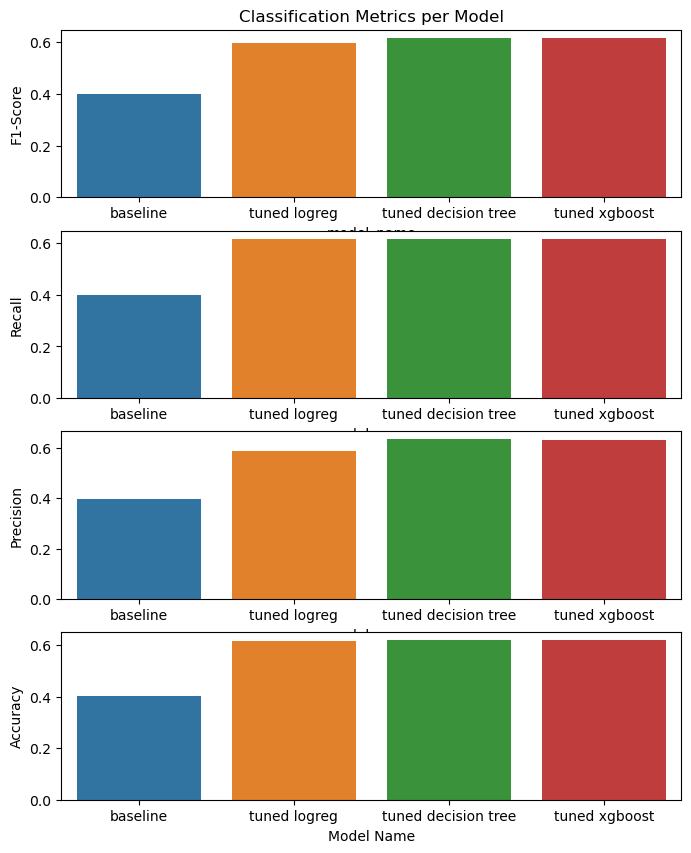

In [1133]:
fig,ax = plt.subplots(4,1,figsize=(8,10))
sns.barplot(x='model_name',y='f1-score',data=metrics_df,ax=ax[0])
sns.barplot(x='model_name',y='recall',data=metrics_df,ax=ax[1])
sns.barplot(x='model_name',y='precision',data=metrics_df,ax=ax[2])
sns.barplot(x='model_name',y='accuracy',data=metrics_df,ax=ax[3])
ax[0].set_title("Classification Metrics per Model")
ax[3].set_xlabel("Model Name")
ax[0].set_ylabel("F1-Score")
ax[1].set_ylabel("Recall")
ax[2].set_ylabel("Precision")
ax[3].set_ylabel("Accuracy")
plt.savefig('images/model_classification_metrics.png',dpi=300)

# To-Be Deleted

**ROC_AUC_One_Vs_Rest**

In [208]:
log_gs_pipe2 = GridSearchCV(estimator=log_pipe,
                           param_grid=log_pipe_grid,scoring='roc_auc_ovr',cv=5)

In [209]:
log_gs_pipe2.fit(X1_train,y1_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('obj_imputer',
                                                                         Pipeline(steps=[('ohe_transform',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['GADE',
                                                                          'Work']),
                                                                        ('numimputer',
                                                                         Pipeline(steps=[('numimputer',
                                                                                          IterativeImputer(initial_strategy='median',
                                                                                                           random_state=42))]),
                                                                         ['Hours',
                                                                          'streams']),
                                                                        ('age...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['GADE',
                                                                          'Game',
                                                                          'Platform',
                                                                          'earnings',
                                                                          'whyplay',
                                                                          'Gender',
                                                                          'Work',
                                                                          'Degree',
                                                                          'Birthplace',
                                                                          'Residence',
                                                                          'Playstyle'])])),
                                       ('model',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42))]),
             param_grid={'model__C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'model__penalty': ['l2'],
                         'model__solver': ['lbfgs', 'newton-cg']},
             scoring='roc_auc_ovr')

In [210]:
# scoring metric = roc_auc one vs. rest 
log_gs_pipe2.best_score_

0.780995114787963

In [211]:
log_best_model2 = log_gs_pipe2.best_estimator_
best_log_ypred2 = log_best_model2.predict(X1_test)

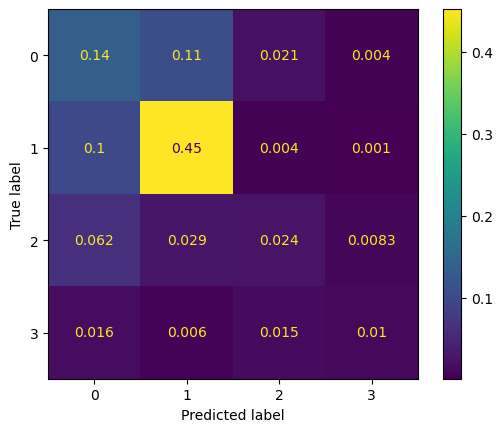

In [212]:
ConfusionMatrixDisplay.from_predictions(y1_test,best_log_ypred2,normalize='all')

In [213]:
print(classification_report(y1_test,best_log_ypred2, target_names=target_labels))

                  precision    recall  f1-score   support

 minimal anxiety       0.43      0.51      0.47       817
    mild anxiety       0.76      0.81      0.78      1683
moderate anxiety       0.38      0.20      0.26       373
  severe anxiety       0.44      0.22      0.29       142

        accuracy                           0.62      3015
       macro avg       0.50      0.43      0.45      3015
    weighted avg       0.61      0.62      0.61      3015



In [313]:
accuracy_score(y1_test,best_log_ypred2)

0.6238805970149254

**F1 score**

In [214]:
# f1 score for best log_reg model using roc_auc_ovr as scoring criteria 
f1_score(y1_test,best_log_ypred2,average='weighted')

0.6095521121662114

In [215]:
log_gs_pipe3 = GridSearchCV(estimator=log_pipe,
                           param_grid=log_pipe_grid,scoring='f1_weighted',cv=5)

In [216]:
log_gs_pipe3.fit(X1_train,y1_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('obj_imputer',
                                                                         Pipeline(steps=[('ohe_transform',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['GADE',
                                                                          'Work']),
                                                                        ('numimputer',
                                                                         Pipeline(steps=[('numimputer',
                                                                                          IterativeImputer(initial_strategy='median',
                                                                                                           random_state=42))]),
                                                                         ['Hours',
                                                                          'streams']),
                                                                        ('age...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['GADE',
                                                                          'Game',
                                                                          'Platform',
                                                                          'earnings',
                                                                          'whyplay',
                                                                          'Gender',
                                                                          'Work',
                                                                          'Degree',
                                                                          'Birthplace',
                                                                          'Residence',
                                                                          'Playstyle'])])),
                                       ('model',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42))]),
             param_grid={'model__C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'model__penalty': ['l2'],
                         'model__solver': ['lbfgs', 'newton-cg']},
             scoring='f1_weighted')

In [217]:
log_gs_pipe3.best_score_

0.599919309307288

In [218]:
log_best_model3 = log_gs_pipe3.best_estimator_
best_log_ypred3 = log_best_model3.predict(X1_test)

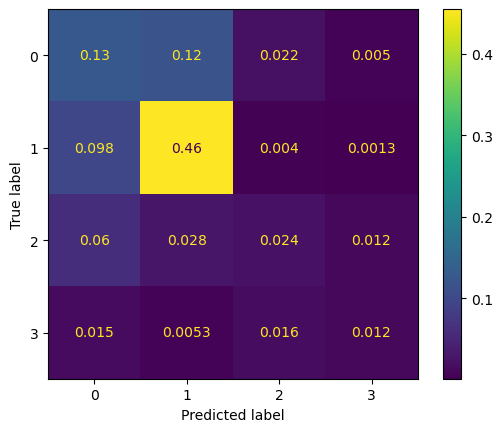

In [219]:
ConfusionMatrixDisplay.from_predictions(y1_test,best_log_ypred3,normalize='all')

In [220]:
print(classification_report(y1_test,best_log_ypred3, target_names=target_labels))

                  precision    recall  f1-score   support

 minimal anxiety       0.42      0.47      0.45       817
    mild anxiety       0.75      0.82      0.78      1683
moderate anxiety       0.36      0.19      0.25       373
  severe anxiety       0.39      0.25      0.30       142

        accuracy                           0.62      3015
       macro avg       0.48      0.43      0.44      3015
    weighted avg       0.60      0.62      0.60      3015



#### Hypertuning Parameters with RandomizedSearchCV 

In [234]:
# using RandomSearchCV with new grid parameters,
log_roc_random_cv = RandomizedSearchCV(estimator=log_pipe, 
                                       param_distributions = log_pipe_grid2, 
                                       scoring = 'roc_auc_ovr',
                                       n_iter = 10, 
                                       cv = 5)

In [235]:
# fitting RandomSearchCV to training data 
log_roc_random_cv.fit(X1_train,y1_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('obj_imputer',
                                                                               Pipeline(steps=[('ohe_transform',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['GADE',
                                                                                'Work']),
                                                                              ('numimputer',
                                                                               Pipeline(steps=[('numimputer',
                                                                                                IterativeImputer(initial_strategy='median',
                                                                                                                 random_state=42))]),
                                                                               ['Hours',
                                                                                'streams'])...
                                                                                'Game',
                                                                                'Platform',
                                                                                'earnings',
                                                                                'whyplay',
                                                                                'Gender',
                                                                                'Work',
                                                                                'Degree',
                                                                                'Birthplace',
                                                                                'Residence',
                                                                                'Playstyle'])])),
                                             ('model',
                                              LogisticRegression(max_iter=10000,
                                                                 random_state=42))]),
                   param_distributions={'model__C': [0.0001, 0.001, 0.01, 0.1,
                                                     1],
                                        'model__class_weight': [None,
                                                                'balanced'],
                                        'model__penalty': ['l2'],
                                        'model__solver': ['lbfgs',
                                                          'newton-cg']},
                   scoring='roc_auc_ovr')

In [244]:
# RandomSearchCV results with roc_auc_ovr as scoring metric 
# allows us to visually inspect each model and params 
log_randomcv_results = pd.DataFrame(log_roc_random_cv.cv_results_)
log_randomcv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__solver,param_model__penalty,param_model__class_weight,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.947739,0.632879,0.023736,0.003116,lbfgs,l2,None,0.0001,"{'model__solver': 'lbfgs', 'model__penalty': '...",0.702680,0.704465,0.650654,0.674990,0.690861,0.684730,0.020027,8
1,0.753367,0.215069,0.023536,0.002647,lbfgs,l2,balanced,0.0001,"{'model__solver': 'lbfgs', 'model__penalty': '...",0.694926,0.697467,0.634679,0.674487,0.665452,0.673402,0.022831,9
2,5.741197,0.559965,0.025133,0.004610,newton-cg,l2,None,1,"{'model__solver': 'newton-cg', 'model__penalty...",0.776299,0.762044,0.775484,0.772421,0.792282,0.775706,0.009722,2
3,3.006205,0.345473,0.030718,0.006834,newton-cg,l2,None,0.1,"{'model__solver': 'newton-cg', 'model__penalty...",0.784602,0.767308,0.778943,0.776645,0.796802,0.780860,0.009729,1
4,7.693954,1.872703,0.022938,0.002444,lbfgs,l2,balanced,0.1,"{'model__solver': 'lbfgs', 'model__penalty': '...",0.766722,0.748923,0.756542,0.759994,0.767913,0.760019,0.006964,4


In [243]:
# best parameters for LogisticRegression using roc_auc_ovr score as scoring metric 
log_roc_random_cv.best_params_

{'model__solver': 'newton-cg',
 'model__penalty': 'l2',
 'model__class_weight': None,
 'model__C': 0.1}

In [241]:
# roc_auc_ovr score using best estimator 
log_roc_random_cv.best_score_

0.7808600794584362

In [247]:
# using RandomSearchCV with f1_weighted scores as scoring criterion 
log_f1score_random_cv = RandomizedSearchCV(estimator=log_pipe, 
                                       param_distributions = log_pipe_grid2, 
                                       scoring = 'f1_weighted',
                                       n_iter = 10, 
                                       cv = 5)

In [248]:
# fitting RandomSearchCV to training data 
log_f1score_random_cv.fit(X1_train,y1_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('obj_imputer',
                                                                               Pipeline(steps=[('ohe_transform',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['GADE',
                                                                                'Work']),
                                                                              ('numimputer',
                                                                               Pipeline(steps=[('numimputer',
                                                                                                IterativeImputer(initial_strategy='median',
                                                                                                                 random_state=42))]),
                                                                               ['Hours',
                                                                                'streams'])...
                                                                                'Game',
                                                                                'Platform',
                                                                                'earnings',
                                                                                'whyplay',
                                                                                'Gender',
                                                                                'Work',
                                                                                'Degree',
                                                                                'Birthplace',
                                                                                'Residence',
                                                                                'Playstyle'])])),
                                             ('model',
                                              LogisticRegression(max_iter=10000,
                                                                 random_state=42))]),
                   param_distributions={'model__C': [0.0001, 0.001, 0.01, 0.1,
                                                     1],
                                        'model__class_weight': [None,
                                                                'balanced'],
                                        'model__penalty': ['l2'],
                                        'model__solver': ['lbfgs',
                                                          'newton-cg']},
                   scoring='f1_weighted')

In [250]:
log_f1score_random_cv.best_params_

{'model__solver': 'newton-cg',
 'model__penalty': 'l2',
 'model__class_weight': None,
 'model__C': 0.1}

In [251]:
log_f1score_random_cv.best_score_

0.5992847072131792

## Tuning Decision Tree Model based on different classification metrics

In [287]:
# RandomizedSearchCV with roc_auc_ovr as scoring criteria 
dt_roc_random_cv = RandomizedSearchCV(estimator = dt_pipe, 
                                       param_distributions = dt_pipe_grid,
                                       n_iter = 10, 
                                       scoring='roc_auc_ovr', 
                                       cv = 5)

In [288]:
dt_roc_random_cv.fit(X2_train,y2_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('obj_imputer',
                                                                               Pipeline(steps=[('ohe_transform',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['GADE',
                                                                                'Work']),
                                                                              ('numimputer',
                                                                               Pipeline(steps=[('numimputer',
                                                                                                IterativeImputer(initial_strategy='median',
                                                                                                                 random_state=42))]),
                                                                               ['Hours',
                                                                                'streams'])...
                                                                                                              sparse_output=False))]),
                                                                               ['GADE',
                                                                                'Game',
                                                                                'Platform',
                                                                                'earnings',
                                                                                'whyplay',
                                                                                'Gender',
                                                                                'Work',
                                                                                'Degree',
                                                                                'Birthplace',
                                                                                'Residence',
                                                                                'Playstyle'])])),
                                             ('model',
                                              DecisionTreeClassifier(random_state=42))]),
                   param_distributions={'model__max_depth': [2, 4, 6, 8, 10],
                                        'model__min_samples_leaf': [1, 10, 100,
                                                                    500, 1000],
                                        'model__min_samples_split': [2, 10, 100,
                                                                     500,
                                                                     1000]},
                   scoring='roc_auc_ovr')

In [289]:
# roc_auc_ovr score of best Decision Tree Model 
dt_roc_random_cv.best_score_, dt_roc_random_cv.best_params_

(0.7755704900212207,
 {'model__min_samples_split': 100,
  'model__min_samples_leaf': 100,
  'model__max_depth': 8})

In [324]:
dt_best_roc_model = dt_roc_random_cv.best_estimator_
best_dt_roc_preds = dt_best_roc_model.predict(X2_test)

In [325]:
print(classification_report(y2_test,best_dt_roc_preds,target_names=target_labels))

                  precision    recall  f1-score   support

 minimal anxiety       0.43      0.55      0.48       817
    mild anxiety       0.79      0.77      0.78      1683
moderate anxiety       0.36      0.19      0.25       373
  severe anxiety       0.36      0.32      0.34       142

        accuracy                           0.62      3015
       macro avg       0.48      0.46      0.46      3015
    weighted avg       0.62      0.62      0.61      3015



In [290]:
# RandomizedSearchCV with f1_weighted as scoring criteria
dt_f1_random_cv = RandomizedSearchCV(estimator = dt_pipe, 
                                       param_distributions = dt_pipe_grid,
                                       n_iter = 10, 
                                       scoring='f1_weighted', 
                                       cv = 5)

In [291]:
dt_f1_random_cv.fit(X2_train,y2_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('obj_imputer',
                                                                               Pipeline(steps=[('ohe_transform',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['GADE',
                                                                                'Work']),
                                                                              ('numimputer',
                                                                               Pipeline(steps=[('numimputer',
                                                                                                IterativeImputer(initial_strategy='median',
                                                                                                                 random_state=42))]),
                                                                               ['Hours',
                                                                                'streams'])...
                                                                                                              sparse_output=False))]),
                                                                               ['GADE',
                                                                                'Game',
                                                                                'Platform',
                                                                                'earnings',
                                                                                'whyplay',
                                                                                'Gender',
                                                                                'Work',
                                                                                'Degree',
                                                                                'Birthplace',
                                                                                'Residence',
                                                                                'Playstyle'])])),
                                             ('model',
                                              DecisionTreeClassifier(random_state=42))]),
                   param_distributions={'model__max_depth': [2, 4, 6, 8, 10],
                                        'model__min_samples_leaf': [1, 10, 100,
                                                                    500, 1000],
                                        'model__min_samples_split': [2, 10, 100,
                                                                     500,
                                                                     1000]},
                   scoring='f1_weighted')

In [292]:
# f1_weighted score of best Decision Tree Model 
dt_f1_random_cv.best_score_, dt_f1_random_cv.best_params_

(0.614618276481781,
 {'model__min_samples_split': 100,
  'model__min_samples_leaf': 100,
  'model__max_depth': 6})

In [710]:
log_gs_pipe = GridSearchCV(estimator=log_pipe,
                           param_grid=baselog_pipe_grid)

In [711]:
log_gs_pipe.fit(X1_train,y1_train)

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2, 6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\skl

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2, 6, 7] during transform. These unknown categories will be encoded as all zeros
C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('numimputer',
                                                                                          IterativeImputer(initial_strategy='median',
                                                                                                           random_state=42)),
                                                                                         ('agenorm',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Hours',
                                                                          'streams']),
                                                                        ('obj_pipeline',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(fill_value='Did '
                                                                                                                   'not '
                                                                                                                   'answer',
                                                                                                        strategy=...
                                                                                                        sparse_output=False)),
                                                                                         ('ohe_norm',
                                                                                          StandardScaler())]),
                                                                         ['Game',
                                                                          'Platform',
                                                                          'earnings',
                                                                          'whyplay',
                                                                          'Gender',
                                                                          'Degree',
                                                                          'Birthplace',
                                                                          'Residence',
                                                                          'Playstyle'])])),
                                       ('model',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42))]),
             param_grid={'model__C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'model__class_weight': [None, 'balanced'],
                         'model__penalty': ['l2'],
                         'model__solver': ['lbfgs', 'newton-cg']})

### Hyperparameter Tuning Baseline Logistic Regression Model

In [87]:
# Logistic Regression Model paramaters grid
log_params_grid2 = {'model__penalty':['l2'],
                 'model__C': [1e-4,1e-3,1e-2,1e-1,1],
                'model__solver':['lbfgs','newton-cg'],
                 'model__class_weight':[None,'balanced']}

In [89]:
# GridSearchCV using default scoring criteria = accuracy 
log_rsv_pipe_ = RandomizedSearchCV(estimator=log_pipe, 
                                       param_distributions = log_params_grid2, 
                                       n_iter = 10, 
                                       cv = 5)

In [90]:
# fitting RandomizedSearchCV  pipeline with training data 
log_rsv_pipe_.fit(X1_train,y1_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('obj_imputer',
                                                                               Pipeline(steps=[('ohe_transform',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['GADE',
                                                                                'Work']),
                                                                              ('numimputer',
                                                                               Pipeline(steps=[('numimputer',
                                                                                                IterativeImputer(initial_strategy='median',
                                                                                                                 random_state=42))]),
                                                                               ['Hours',
                                                                                'streams'])...
                                                                                                              sparse_output=False))]),
                                                                               ['GADE',
                                                                                'Game',
                                                                                'Platform',
                                                                                'earnings',
                                                                                'whyplay',
                                                                                'Gender',
                                                                                'Work',
                                                                                'Degree',
                                                                                'Birthplace',
                                                                                'Residence',
                                                                                'Playstyle'])])),
                                             ('model',
                                              LogisticRegression(max_iter=10000,
                                                                 random_state=42))]),
                   param_distributions={'model__C': [0.0001, 0.001, 0.01, 0.1,
                                                     1],
                                        'model__class_weight': [None,
                                                                'balanced'],
                                        'model__penalty': ['l2'],
                                        'model__solver': ['lbfgs',
                                                          'newton-cg']})

In [92]:
# best hyperparamter tuned model accuracy score
best_log_rsv_preds = log_rsv_pipe_.predict(X1_test)

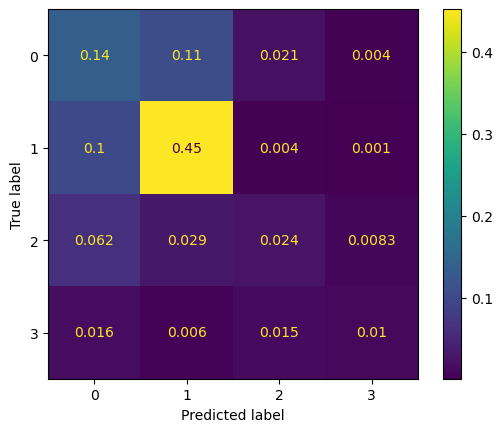

In [93]:
ConfusionMatrixDisplay.from_predictions(y1_test,best_log_rsv_preds,normalize='all')

In [119]:
# classification report for best Logistic Regression Model w. hyperparamter tuning 
best_logreg_report = classification_report(y1_test,best_log_rsv_preds, target_names=target_labels)
print(best_logreg_report)

                  precision    recall  f1-score   support

 minimal anxiety       0.43      0.51      0.47       817
    mild anxiety       0.76      0.81      0.78      1683
moderate anxiety       0.38      0.20      0.26       373
  severe anxiety       0.44      0.22      0.29       142

        accuracy                           0.62      3015
       macro avg       0.50      0.43      0.45      3015
    weighted avg       0.61      0.62      0.61      3015



Tried to plot feature importances 

In [382]:
gad_cols = ['GAD1','GAD2','GAD3','GAD4','GAD5','GAD6','GAD7','GADE', 'anxiety','GAD_T']

In [383]:
# feature selection 
X_7 = gamers_df.drop(columns=gad_cols)
y_7 = gamers_df['anxiety']

In [384]:
# label encoding our target variable 
y_7 = lab_enc.fit_transform(y_7)

In [385]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X_7, y_7, test_size = 0.25,random_state=42)

In [396]:
best_dt_model = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=10,max_depth=4)

In [397]:
best_dt_model.fit(X7_train,y7_train)

ValueError: could not convert string to float: 'League of Legends'